In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
# read data
df = pd.read_csv('data/09-2-admission_chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# define target and features
y = df['Chance of Admit ']
X = df.drop(['Serial No','Chance of Admit '],axis=1)

In [4]:
# split into train and test sample
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2529)

In [5]:
# select model
dtr = DecisionTreeRegressor(max_depth=3, random_state=2529)

# train model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [6]:
# predict with model
predict_train = dtr.predict(X_train)
predict_test = dtr.predict(X_test)

print("Train Error:", mean_absolute_error(y_train,predict_train))
print("Test Error:", mean_absolute_error(y_test,predict_test))

Train Error: 0.049278697667523144
Test Error: 0.057160452637289014


In [7]:
# evaluate the model on training sample
er_train = dtr.score(X_train,y_train)
print("Train Error: ", er_train)

# evaluate the model on the test sample
er_test = dtr.score(X_test,y_test)
print("Test Error: ", er_test)

Train Error:  0.7738322816632399
Test Error:  0.7533283237506997


[Text(418.5, 475.65000000000003, 'CGPA <= 8.93\nmse = 0.019\nsamples = 320\nvalue = 0.731'),
 Text(209.25, 339.75, 'CGPA <= 8.035\nmse = 0.012\nsamples = 217\nvalue = 0.663'),
 Text(104.625, 203.85000000000002, 'GRE Score <= 305.5\nmse = 0.01\nsamples = 55\nvalue = 0.548'),
 Text(52.3125, 67.94999999999999, 'mse = 0.009\nsamples = 36\nvalue = 0.514'),
 Text(156.9375, 67.94999999999999, 'mse = 0.006\nsamples = 19\nvalue = 0.611'),
 Text(313.875, 203.85000000000002, 'CGPA <= 8.63\nmse = 0.006\nsamples = 162\nvalue = 0.702'),
 Text(261.5625, 67.94999999999999, 'mse = 0.006\nsamples = 103\nvalue = 0.676'),
 Text(366.1875, 67.94999999999999, 'mse = 0.004\nsamples = 59\nvalue = 0.748'),
 Text(627.75, 339.75, 'CGPA <= 9.225\nmse = 0.005\nsamples = 103\nvalue = 0.876'),
 Text(523.125, 203.85000000000002, 'GRE Score <= 318.5\nmse = 0.003\nsamples = 53\nvalue = 0.827'),
 Text(470.8125, 67.94999999999999, 'mse = 0.003\nsamples = 8\nvalue = 0.774'),
 Text(575.4375, 67.94999999999999, 'mse = 0.002\

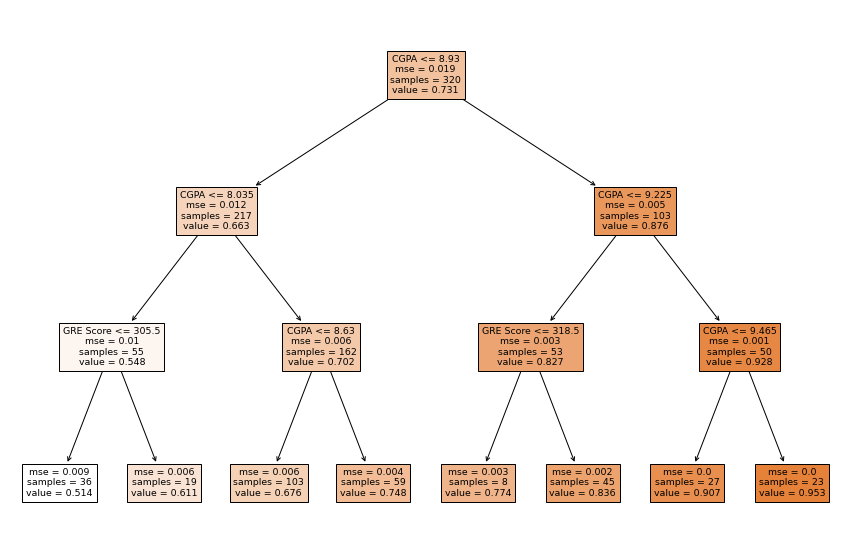

In [8]:
# plot tree
fig,ax = plt.subplots(figsize=(15,10))
dtr.fit(X_train, y_train)
plot_tree(dtr, feature_names=X.columns, filled=True)